In [2]:
import sys
sys.path.append('../')
from deep_rl.gridworld import ReachGridWorld, PickGridWorld, PORGBEnv, GoalManager, ScaleObsEnv
from deep_rl.network import *
from deep_rl.utils import *
import os
import random
import dill
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import display
from PIL import Image
from pathlib import Path
from IPython.core.debugger import Tracer

def set_seed(s):
    random.seed(s)
    np.random.seed(s)
    torch.manual_seed(s)

set_seed(0) # set seed 

def imshow(img):
    display(Image.fromarray(np.asarray(img).astype(np.uint8)))

def fload(fn, ftype):
    if ftype == 'json':
        with open(fn) as f:
            return json.load(f)
    elif ftype == 'pkl':
        with open(fn, 'rb') as f:
            return dill.load(f)
    elif ftype == 'png':
        raise NotImplementedError
    else:
        raise Exception('cannot read this data type: {}'.format(ftype))
    
def fsave(data, fn, ftype):
    dirname = os.path.dirname(fn)
    if not os.path.exists(dirname):
        os.makedirs(dirname)
    if ftype == 'json':
        with open(fn, 'w') as f:
            json.dump(data, f)
    elif ftype == 'pkl':
        with open(fn, 'wb') as f:
            dill.dump(data, f)    
    elif ftype == 'png':
        Image.fromarray(data).save(fn)
    else:
        raise Exception('unsupported file type: {}'.format(ftype))
        
GoalConfig = namedtuple('GoalConfig', ['map_name', 'n_goal', 'min_dis'])

def visualize_env_config(env_config):
    env = PORGBEnv(
        PickGridWorld(
            **env_config,
            min_dis=1,
            window=1,
            task_length=1,
            seed=0,
        ),
        l=16,
    )
    img = env.reset(sample_obj_pos=False)
    imshow(img.transpose(1, 2, 0).repeat(16, 0).repeat(16, 1))
    print(env.unwrapped.agent_pos)
    
def get_pick_config(goal_config, train_combos=None, seed=0):
    MAX_OBJ_NUM = 15
    goal_manager = GoalManager(goal_config.map_name, seed=seed)
    obj_pos = goal_manager.gen_goals(MAX_OBJ_NUM + 1, min_dis=goal_config.min_dis)
    obj_pos = [obj_pos[-1:] + obj_pos[:goal_config.n_goal-1]] # always the same test
    if train_combos is None:
        train_combos = [(0, i) for i in range(1, goal_config.n_goal)]
    env_config = dict(
        map_names = [goal_config.map_name],
        train_combos = train_combos,
        test_combos = [(0, 0)],
        num_obj_types=goal_config.n_goal,
        obj_pos=obj_pos,
    )
    return env_config 

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


# EnvConfig for 9 rooms

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maps: [(0, 'map49')]
tasks: [(0, ('A',)), (1, ('B',)), (2, ('C',)), (3, ('D',)), (4, ('E',)), (5, ('F',)), (6, ('G',)), (7, ('H',)), (8, ('I',))]
train: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
test: [(0, 0)]
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


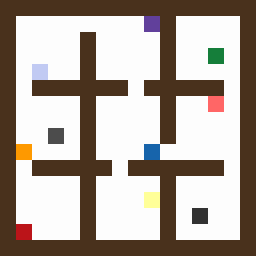

(8, 3)
save to ../data/env_configs/pick/nineroom/nineroom.f3
{'map_names': ['map49'], 'train_combos': [(0, 0), (0, 1), (0, 2)], 'test_combos': [(0, 0)], 'num_obj_types': 9, 'obj_pos': [[(14, 1), (9, 9), (3, 13), (9, 1), (1, 9), (4, 2), (12, 9), (13, 12), (6, 13)]]}


In [6]:
map_name = 'map49'
n_goal = 9
min_dis = 5
seed = 25 #6

template_env_config_dict = dict(
    goal_config=GoalConfig(
        map_name=map_name,
        n_goal=n_goal,
        min_dis=min_dis,
    ),
    train_combos=None,
    seed=seed,
)

env_config = get_pick_config(**template_env_config_dict)
visualize_env_config(env_config)

# subset
env_config_dict = dict(template_env_config_dict)
env_config_dict['train_combos'] = [(0, i) for i in range(3)]
env_config = get_pick_config(**env_config_dict)
save_fn = '../data/env_configs/pick/nineroom/nineroom.f3'
fsave(
    env_config,
    save_fn,
    ftype='pkl',
)
print('save to {}'.format(save_fn))
print(env_config)

# for i in range(9):
#     env_config_dict = dict(template_env_config_dict) # shallow copy
#     env_config_dict['train_combos'] = [(0, i)]
#     env_config = get_pick_config(**env_config_dict)
#     save_fn = '../data/env_configs/pick/nineroom/nineroom.{}'.format(i)
#     fsave(
#         env_config,
#         save_fn,
#         ftype='pkl',
#     )
#     print('save to {}'.format(save_fn))
#     print(env_config)
    
# for i in range(9):
#     env_config_dict = dict(template_env_config_dict) # shallow copy
#     env_config_dict['train_combos'] = [(0, j) for j in range(9) if j != i]
#     env_config = get_pick_config(**env_config_dict)
#     save_fn = '../data/env_configs/pick/nineroom/nineroom.e{}'.format(i)
#     fsave(
#         env_config,
#         save_fn,
#         ftype='pkl',
#     )
#     print('save to {}'.format(save_fn))
#     print(env_config)

# EnvConfig for 4 rooms

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maps: [(0, 'fourroom')]
tasks: [(0, ('A',)), (1, ('B',)), (2, ('C',)), (3, ('D',))]
train: [(0, 1), (0, 2), (0, 3)]
test: [(0, 0)]
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


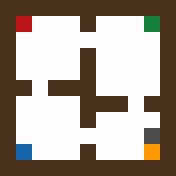

(8, 9)


In [3]:
set_seed(0)

corner = 2

env_config = dict(
    map_names=['fourroom'],
    #train_combos=[(0, 0), (0, 1), (0, 2)],
    train_combos=[(0, 1), (0, 2), (0, 3)],
    test_combos=[(0, 0)],
    num_obj_types=4,
    obj_pos=[[(1, 1), (9, 1), (1, 9), (9, 9)]],
)

visualize_env_config(env_config)

# fsave(
#     env_config,
#     #'../data/env_configs/pick/fourroom/f3',
#     '../data/env_configs/pick/fourroom/l3',
#     ftype='pkl',
# )

# EnvConfig for 4 rooms-16

In [ ]:
set_seed(0)

corner = 3

env_config = dict(
    map_names=['fourroom-16'],
    train_combos=[(0, corner)],
    test_combos=[(0, corner)],
    num_obj_types=4,
    obj_pos=[[(1, 1), (14, 1), (1, 14), (14, 14)]],
)

fsave(
    env_config,
    '../data/env_configs/pick/fourroom-16.{}'.format(corner),
    ftype='pkl',
)